# Iris Flower Classification


- EDA
  - distribution of each variable
  - relationship between pairs of variables
- Modelling
  - cross validation
  - simple logistic regression

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import seaborn as sns
sns.set_style('whitegrid')

## EDA

In [2]:

df = pd.read_csv("Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df = df.set_index('Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


> All attributes are numerical. Variable ranges are small (no need for feature scaling later). There are no missing values.

In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

> Classes are perfectly balanced.

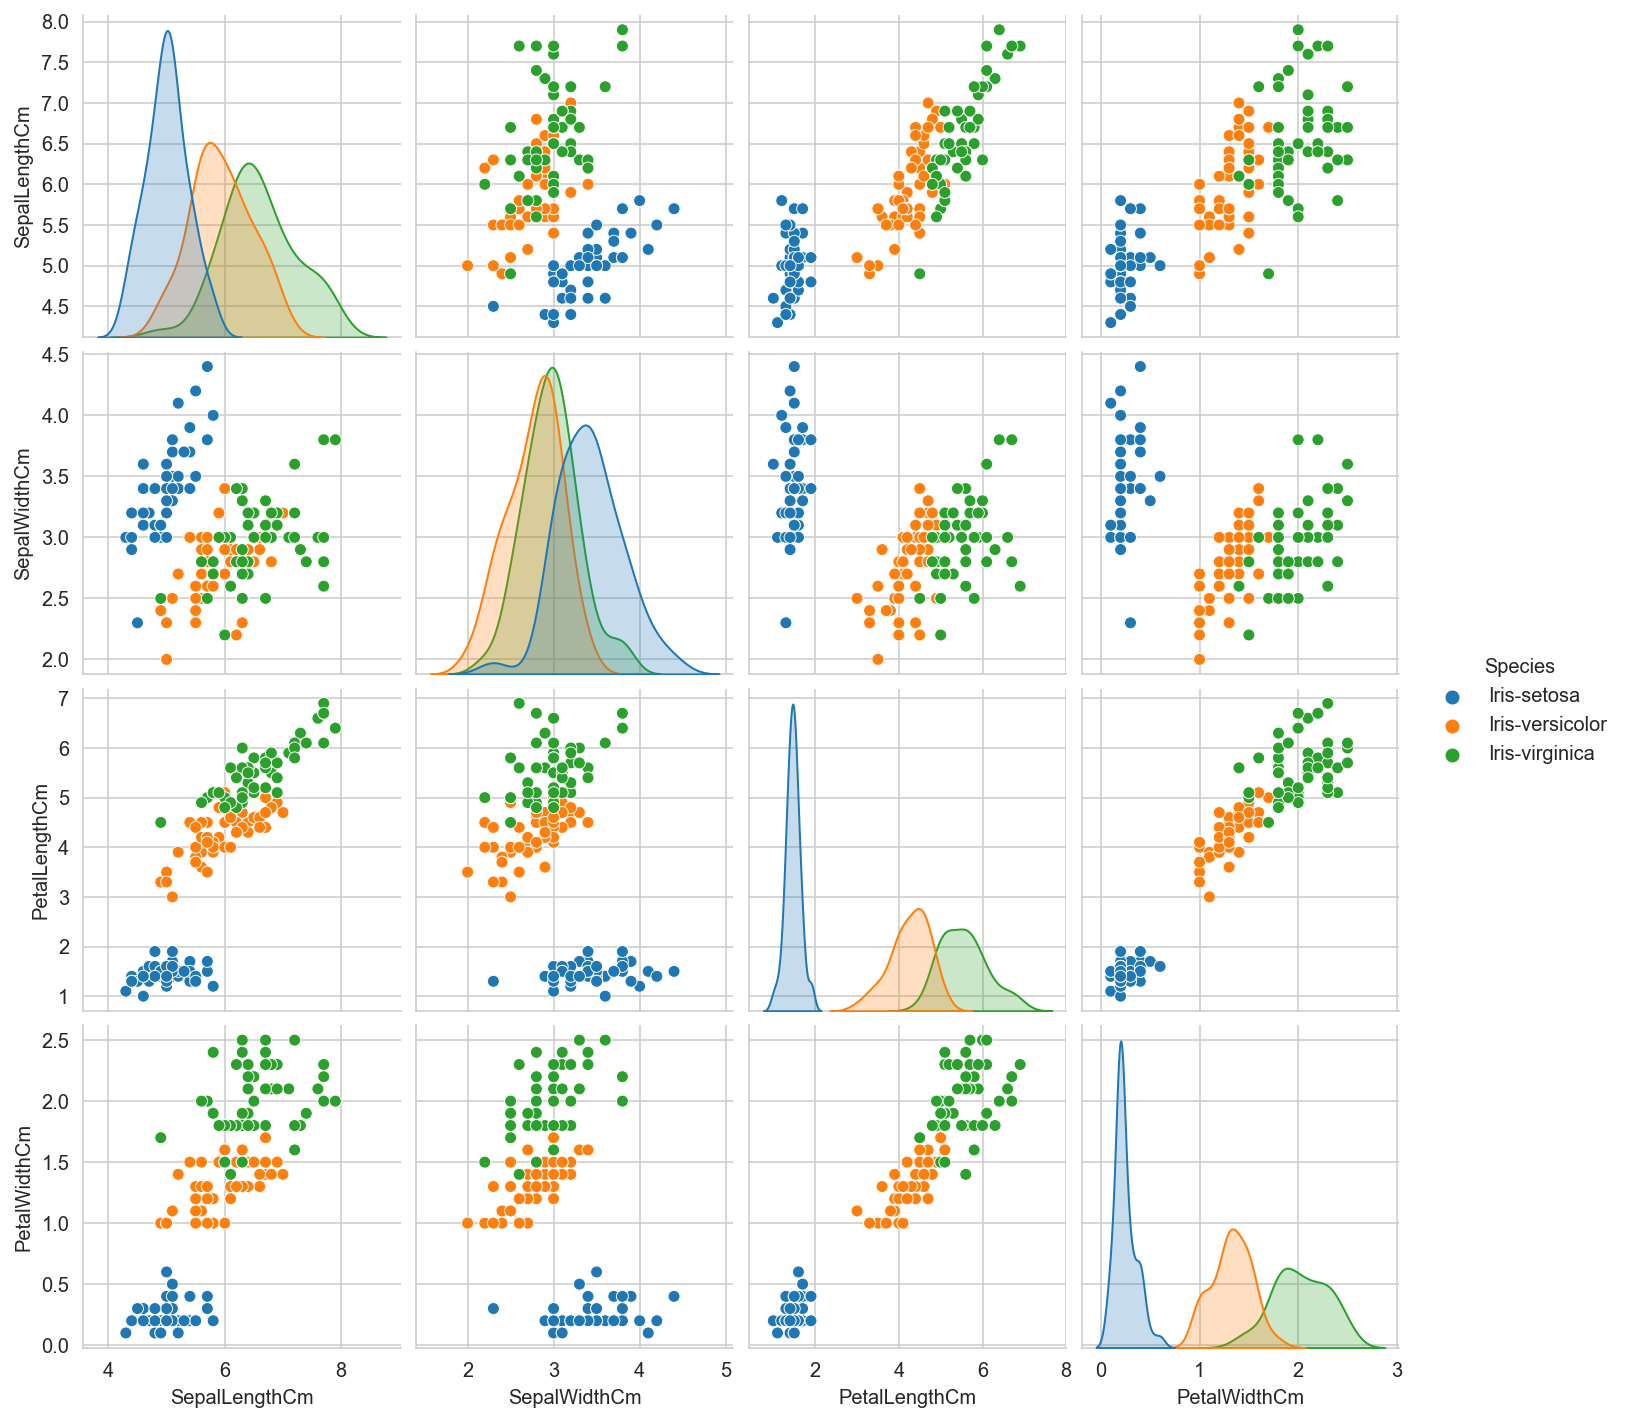

In [6]:
sns.pairplot(df, hue='Species')

> Petal attributes seem to be much more informative than sepal attributes.

## Modelling

In [7]:
target = 'Species'
X = df.drop(columns=[target]).values
y = df[target]

Three things to consider:
- Algorithm - how to train a model: simple but often a good baseline Logistic Regression
- Metric - how to assess the goodness of your model: accuracy
- Validation scheme - how to to evaluate your model in an unbiased manner: 5-fold cross validation 
  - Data is split into 5 folds, each has a turn to act as a test test to validate a model trained with the data from the other 4 folds. 
  - An average of 5 metric values is calculated.
  
Those three things are implemented succintly due to the power of scikit-learn library as below:

In [8]:
model = LogisticRegression(max_iter=1000, random_state=0)
cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()

0.9733333333333334

> I won't try to improve the model performance in this introductory notebook. Instead, the EDA shows that petal length/width seems to be very powerful to distinguish the species. I will test that.

In [9]:
print('Model accuracy using a single feature')
for c in df.columns:
    if c == 'Species':
        break
    
    X = df[[c]].values
    acc = cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()
    print(f'{c:>15}: {acc:.3}')

Model accuracy using a single feature
  SepalLengthCm: 0.753
   SepalWidthCm: 0.56
  PetalLengthCm: 0.953
   PetalWidthCm: 0.96
